<a href="https://colab.research.google.com/github/lro99/fraud_classification/blob/main/New_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# new solar sequential project

In [ ]:
# unzipping zip file
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Plant_1_Generation_Data.csv  
  inflating: Plant_1_Weather_Sensor_Data.csv  
  inflating: Plant_2_Generation_Data.csv  
  inflating: Plant_2_Weather_Sensor_Data.csv  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# examining first dataset
plant1 = pd.read_csv('Plant_1_Generation_Data.csv')
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
# seeing how grouping by source_key would work

y = plant1.groupby('DATE_TIME')
y.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
68756,17-06-2020 23:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0
68757,17-06-2020 23:45,4135001,1IF53ai7Xc0U56Y,0.0,0.0,6034.0,6433566.0
68758,17-06-2020 23:45,4135001,3PZuoBAID5Wc2HD,0.0,0.0,6052.0,7237425.0
68759,17-06-2020 23:45,4135001,7JYdWkrLSPkdwr4,0.0,0.0,5856.0,7846821.0


Figuring out data trends

In [ ]:
# figuring how many datapoints are in a single day.
# getting total number of data points, dividing by number of days in dataset (was told in Kaggle 34)
day = plant1['DAILY_YIELD'].agg('count')
day
day/34

2022.8823529411766

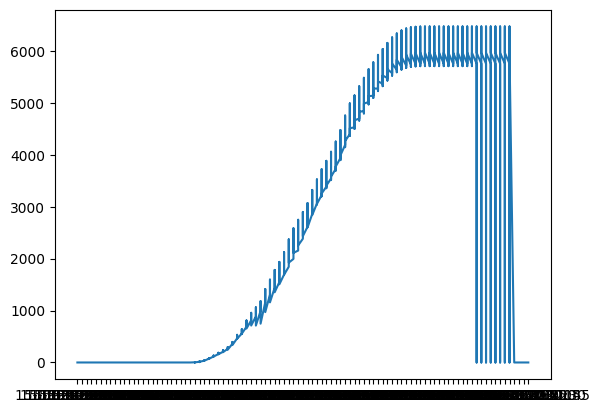

In [ ]:
from matplotlib import pyplot as plt

# estimating this is the data points for first day collected
X = plant1['DATE_TIME'].iloc[:2022]
y=plant1['DAILY_YIELD'].iloc[:2022]
plt.plot(X,y)
plt.show()

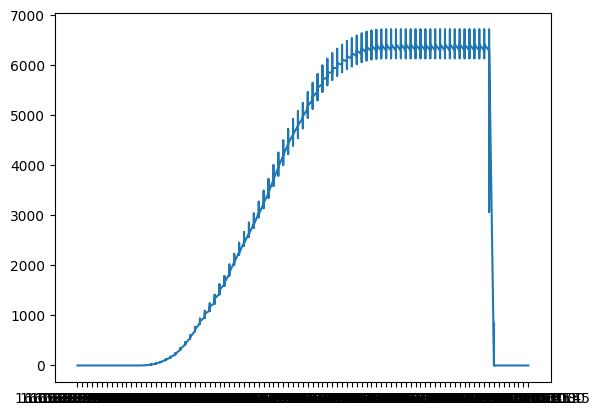

In [ ]:
# estimating this is the data points for second day collected

X = plant1['DATE_TIME'].iloc[2022:4044]
y=plant1['DAILY_YIELD'].iloc[2022:4044]
plt.plot(X,y)
plt.show()

In [ ]:
# what if i get windows of the data and aggregate them into averages? the data seems to be oscillating


From above, I will assume that this is what the daily cycle looks like

In [ ]:
# convert date to date data type

plant1['DATE'] = pd.to_datetime(plant1['DATE_TIME'], format='%d-%m-%Y %H:%M')

Attempt at aggregating the data. Daily yield seems to be oscillating as it increases each day

In [ ]:
# we will group every 100 rows of the data and average the daily yield


x = 100  # number of rows to group

# Calculate the number of groups based on the number of rows and take integer division
num_groups = len(plant1) // x

# Calculate the mean of the desired column for each group
means = [plant1.iloc[i * x : (i + 1) * x]['DAILY_YIELD'].mean() for i in range(num_groups)]

# If the number of rows is not evenly divisible by x, you can calculate the mean for the remaining rows separately
if len(plant1) % x != 0:
    means.append(plant1.iloc[num_groups * x :]['DAILY_YIELD'].mean())

# Print or use the list of means as needed
print(means)

[0.0, 0.0, 0.0, 0.0, 0.0, 15.19886904745, 173.96065476380002, 561.6260595260001, 1174.7850595310001, 1918.6098690600002, 2753.54321428, 3653.15964287, 4583.68816669, 5394.59297618, 5963.985595219999, 6219.06642859, 6247.89321429, 5753.39, 3803.36, 2319.05, 0.0, 0.0, 0.0, 18.681785714580002, 190.43553571520002, 688.729107132, 1383.1546428840002, 2271.36928572, 3154.7437500500005, 4236.27035716, 5108.90071431, 5858.74607142, 6252.48357141, 6425.59982142, 6466.67142856, 6453.86, 6467.0, 6451.19, 5604.1175, 16.1725, 0.0, 0.0, 0.0, 0.0, 6.03267857135, 152.6235714262, 659.361785713, 1501.9046428299998, 2607.2041071500003, 3863.0092261900004, 4836.94857144, 5737.3857143000005, 6555.79357138, 7188.509523799999, 7464.11285712, 7500.58374999, 7510.45, 7499.25, 7510.79, 7397.61285714, 56.8225, 0.0, 0.0, 0.0, 0.0, 8.01482142858, 146.0442857132, 366.412499999, 554.153571427, 845.8628571419999, 1508.36142857, 2408.4437500100003, 3490.5387500300003, 4307.968749969999, 5002.30499996, 5294.97517857, 53

In [ ]:
agg_df = pd.DataFrame(means)
agg_df

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
683,5889.558571
684,5890.140000
685,5888.270000
686,5891.120000


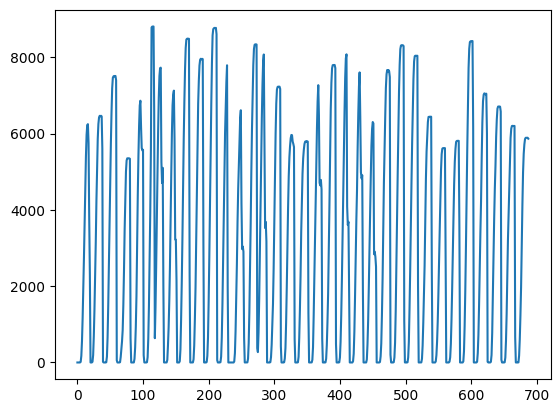

In [ ]:
plt.plot(agg_df)
plt.show()

In [ ]:
# or we can get every x row and make that our new dataframe

In [ ]:
# here we will take every x row (in this case, every 100th row), and we will append that to a new data frame to get a sort of
# sample from the data

selected_rows = []

for i in range(0, len(plant1), 25):
  selected_rows.append(plant1.iloc[i])

sample1 = pd.DataFrame(selected_rows)
sample1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15 00:00:00
25,15-05-2020 00:15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15 00:15:00
50,15-05-2020 00:30,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0,2020-05-15 00:30:00
75,15-05-2020 00:45,4135001,ih0vzX44oOqAx2f,0.0,0.0,0.0,6185184.0,2020-05-15 00:45:00
100,15-05-2020 01:00,4135001,sjndEbLyjtCKgGv,0.0,0.0,0.0,7016832.0,2020-05-15 01:00:00
...,...,...,...,...,...,...,...,...
68675,17-06-2020 22:45,4135001,YxYtjZvoooNbGkE,0.0,0.0,5886.0,7425442.0,2020-06-17 22:45:00
68700,17-06-2020 23:00,4135001,adLQvlD726eNBSB,0.0,0.0,6110.0,6524508.0,2020-06-17 23:00:00
68725,17-06-2020 23:15,4135001,ih0vzX44oOqAx2f,0.0,0.0,5758.0,6426129.0,2020-06-17 23:15:00
68750,17-06-2020 23:30,4135001,sjndEbLyjtCKgGv,0.0,0.0,5887.0,7261681.0,2020-06-17 23:30:00


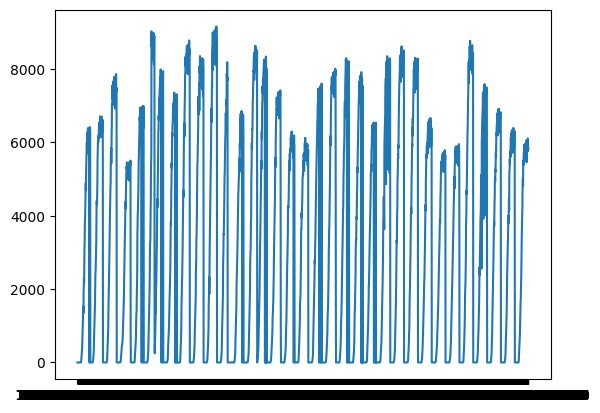

In [ ]:
plt.plot(sample1['DATE_TIME'], sample1['DAILY_YIELD'])
plt.show()

In [ ]:
# splitting data in a way that could keep sequences of data together (?)

column_indices = {name: i for i, name in enumerate(plant1.columns)}

n = len(plant1)
train_df = plant1[0:int(n*0.66)]
val_df = plant1[int(n*0.66):int(n*0.85)]
test_df = plant1[int(n*0.85):]


# from sklearn.model_selection import train_test_split

# # Split into train and test groups
# train_df, test_df = train_test_split(sample1, test_size=0.2, random_state=42)

train_df.shape, val_df.shape, test_df.shape

((45393, 8), (13068, 8), (10317, 8))

In [ ]:
train_df = pd.DataFrame(train_df)
val_df = pd.DataFrame(val_df)
test_df = pd.DataFrame(test_df)

In [ ]:
# figuring out data types in dataset
# object means string or mixed data type

print(plant1.dtypes)

DATE_TIME              object
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
DATE           datetime64[ns]
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# fit and transform source key column to numerical format

train_df.loc[:, 'SOURCE_KEY_ENCODED'] = le.fit_transform(train_df['SOURCE_KEY'])
val_df.loc[:, 'SOURCE_KEY_ENCODED'] = le.fit_transform(val_df['SOURCE_KEY'])
test_df.loc[:, 'SOURCE_KEY_ENCODED'] = le.fit_transform(test_df['SOURCE_KEY'])

# train_df['SOURCE_KEY_ENCODED'] = le.fit_transform(train_df['SOURCE_KEY'])
# test_df['SOURCE_KEY_ENCODED'] = le.transform(test_df['SOURCE_KEY'])

# Display the mapping of activities to their encoded values
activity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
activity_mapping

{'1BY6WEcLGh8j5v7': 0,
 '1IF53ai7Xc0U56Y': 1,
 '3PZuoBAID5Wc2HD': 2,
 '7JYdWkrLSPkdwr4': 3,
 'McdE0feGgRqW7Ca': 4,
 'VHMLBKoKgIrUVDU': 5,
 'WRmjgnKYAwPKWDb': 6,
 'YxYtjZvoooNbGkE': 7,
 'ZnxXDlPa8U1GXgE': 8,
 'ZoEaEvLYb1n2sOq': 9,
 'adLQvlD726eNBSB': 10,
 'bvBOhCH3iADSZry': 11,
 'iCRJl6heRkivqQ3': 12,
 'ih0vzX44oOqAx2f': 13,
 'pkci93gMrogZuBj': 14,
 'rGa61gmuvPhdLxV': 15,
 'sjndEbLyjtCKgGv': 16,
 'uHbuxQJl8lW7ozc': 17,
 'wCURE6d3bPkepu2': 18,
 'z9Y9gH1T5YWrNuG': 19,
 'zBIq5rxdHJRwDNY': 20,
 'zVJPv84UY57bAof': 21}

In [ ]:
# # convert date column to date type?

# train_df['DATE'] = pd.to_datetime(train_df['DATE_TIME'], format='%d-%m-%Y %H:%M')
# test_df['DATE'] = pd.to_datetime(test_df['DATE_TIME'], format='%d-%m-%Y %H:%M')


In [ ]:
# extract meaningful features about the date

def extract_date_features(dataset, old_date_column):
  dataset.loc[:, 'Year'] = dataset[old_date_column].dt.year
  dataset.loc[:, 'Month'] = dataset[old_date_column].dt.month
  dataset.loc[:, 'Day'] = dataset[old_date_column].dt.day
  dataset.loc[:, 'Hour'] = dataset[old_date_column].dt.hour
  dataset.loc[:, 'Minute'] = dataset[old_date_column].dt.minute
  # dataset['Month'] = dataset[old_date_column].dt.month
  # dataset['Day'] = dataset[old_date_column].dt.day
  # dataset['Hour'] = dataset[old_date_column].dt.hour
  # dataset['Minute'] = dataset[old_date_column].dt.minute

extract_date_features(train_df, 'DATE')
extract_date_features(val_df, 'DATE')
extract_date_features(test_df, 'DATE')


In [ ]:
train_df.sort_index()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,SOURCE_KEY_ENCODED,Year,Month,Day,Hour,Minute
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15 00:00:00,0,2020,5,15,0,0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15 00:00:00,1,2020,5,15,0,0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15 00:00:00,2,2020,5,15,0,0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15 00:00:00,3,2020,5,15,0,0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15 00:00:00,4,2020,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45388,06-06-2020 21:30,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6953094.0,2020-06-06 21:30:00,18,2020,6,6,21,30
45389,06-06-2020 21:30,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7177289.0,2020-06-06 21:30:00,19,2020,6,6,21,30
45390,06-06-2020 21:30,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6506728.0,2020-06-06 21:30:00,20,2020,6,6,21,30
45391,06-06-2020 21:30,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7285530.0,2020-06-06 21:30:00,21,2020,6,6,21,30


In [ ]:
val_df.sort_index()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,SOURCE_KEY_ENCODED,Year,Month,Day,Hour,Minute
45393,06-06-2020 21:45,4135001,1IF53ai7Xc0U56Y,0.0,0.0,6542.0,6355099.0,2020-06-06 21:45:00,1,2020,6,6,21,45
45394,06-06-2020 21:45,4135001,3PZuoBAID5Wc2HD,0.0,0.0,6496.0,7158982.0,2020-06-06 21:45:00,2,2020,6,6,21,45
45395,06-06-2020 21:45,4135001,7JYdWkrLSPkdwr4,0.0,0.0,6317.0,7770457.0,2020-06-06 21:45:00,3,2020,6,6,21,45
45396,06-06-2020 21:45,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7331160.0,2020-06-06 21:45:00,4,2020,6,6,21,45
45397,06-06-2020 21:45,4135001,VHMLBKoKgIrUVDU,0.0,0.0,6435.0,7377989.0,2020-06-06 21:45:00,5,2020,6,6,21,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58456,13-06-2020 02:00,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6993908.0,2020-06-13 02:00:00,18,2020,6,13,2,0
58457,13-06-2020 02:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7216867.0,2020-06-13 02:00:00,19,2020,6,13,2,0
58458,13-06-2020 02:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6549387.0,2020-06-13 02:00:00,20,2020,6,13,2,0
58459,13-06-2020 02:00,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7328550.0,2020-06-13 02:00:00,21,2020,6,13,2,0


In [ ]:
# # encoding date column


# le2 = LabelEncoder()

# # fit and transform date column to numerical format

# train_df['DATE_ENCODED'] = le2.fit_transform(train_df['DATE'])
# test_df['DATE_ENCODED'] = le2.transform(test_df['DATE'])

# # Display the mapping of dates to their encoded values
# activity_mapping_date = dict(zip(le2.classes_, le2.transform(le2.classes_)))
# activity_mapping_date

In [ ]:
# dropping out original date time column and source key column

train_df.drop('DATE_TIME', axis=1, inplace=True)
val_df.drop('DATE_TIME', axis=1, inplace=True)
test_df.drop('DATE_TIME', axis=1, inplace=True)

train_df.drop('DATE', axis=1, inplace=True)
val_df.drop('DATE', axis=1, inplace=True)
test_df.drop('DATE', axis=1, inplace=True)

train_df.drop('SOURCE_KEY', axis=1, inplace=True)
val_df.drop('SOURCE_KEY', axis=1, inplace=True)
test_df.drop('SOURCE_KEY', axis=1, inplace=True)

train_df

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_ENCODED,Year,Month,Day,Hour,Minute
0,4135001,0.0,0.0,0.0,6259559.0,0,2020,5,15,0,0
1,4135001,0.0,0.0,0.0,6183645.0,1,2020,5,15,0,0
2,4135001,0.0,0.0,0.0,6987759.0,2,2020,5,15,0,0
3,4135001,0.0,0.0,0.0,7602960.0,3,2020,5,15,0,0
4,4135001,0.0,0.0,0.0,7158964.0,4,2020,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45388,4135001,0.0,0.0,0.0,6953094.0,18,2020,6,6,21,30
45389,4135001,0.0,0.0,0.0,7177289.0,19,2020,6,6,21,30
45390,4135001,0.0,0.0,0.0,6506728.0,20,2020,6,6,21,30
45391,4135001,0.0,0.0,0.0,7285530.0,21,2020,6,6,21,30


In [ ]:
train_df.dtypes

PLANT_ID                int64
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
SOURCE_KEY_ENCODED      int64
Month                   int32
Day                     int32
Hour                    int32
Minute                  int32
Year                    int32
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting relevant columns as features
feature_columns = ['PLANT_ID', 'DC_POWER', 'AC_POWER', 'TOTAL_YIELD', 'SOURCE_KEY_ENCODED', 'Month', 'Day', 'Hour', 'Minute']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_df.loc[:, feature_columns] = scaler.fit_transform(train_df[feature_columns])
val_df.loc[:, feature_columns] = scaler.fit_transform(val_df[feature_columns])
test_df.loc[:, feature_columns] = scaler.transform(test_df[feature_columns])

# Display first few rows of the normalized training data
train_df[feature_columns].head()

,PLANT_ID,DC_POWER,AC_POWER,TOTAL_YIELD,SOURCE_KEY_ENCODED,Month,Day,Hour,Minute
0,0,0.0,0.0,0.047841,0.000000,0,0.466667,0.0,0.0
1,0,0.0,0.0,0.000000,0.047619,0,0.466667,0.0,0.0
2,0,0.0,0.0,0.506748,0.095238,0,0.466667,0.0,0.0
3,0,0.0,0.0,0.894444,0.142857,0,0.466667,0.0,0.0
4,0,0.0,0.0,0.614641,0.190476,0,0.466667,0.0,0.0


In [ ]:
# def create_sequences(data, feature_columns, target_column, sequence_length):
#     """
#     Reshape the data into sequences for LSTM.
#     """
#     X, y = [], []
#     for i in range(len(data) - sequence_length):
#         X.append(data[feature_columns].iloc[i:i+sequence_length].values)
#         y.append(data[target_column].iloc[i+sequence_length])
#     return np.array(X), np.array(y)

# sequence_length = 10

# # Create sequences for train and test data
# X_train, y_train = create_sequences(train_df, feature_columns, 'DAILY_YIELD', sequence_length)
# X_test, y_test = create_sequences(test_df, feature_columns, 'DAILY_YIELD', sequence_length)

# X_train.shape, y_train.shape, X_test.shape, y_test.shape



# # kept running out of RAM with this, below cell puts this function into batches

Baseline Attempt

In [ ]:
plant1.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'DATE'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = train_df[['PLANT_ID', 'SOURCE_KEY_ENCODED', 'DC_POWER', 'AC_POWER', 'TOTAL_YIELD', 'Month', 'Day', 'Hour', 'Minute']]
y = train_df['DAILY_YIELD']


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

print("MSE:", mse)
print("R value:", r_squared)

MSE: 3323199.8262482067
R value: 0.6768467716235648


In [ ]:
train_df.shape

(2201, 11)

In [ ]:
# doing the above function but with numpy arrays to prevent running out of ram

def create_sequences(data, feature_columns, target_column, sequence_length):
    """
    Reshape the data into sequences for LSTM.
    """
    X = data[feature_columns].values
    y = data[target_column].values
    num_samples = len(data) - sequence_length + 1
    X_seq = np.zeros((num_samples, sequence_length, len(feature_columns)))
    y_seq = np.zeros((num_samples,))
    for i in range(num_samples):
        X_seq[i] = X[i:i+sequence_length]
        y_seq[i] = y[i+sequence_length-1]
    return X_seq, y_seq

sequence_length = 100 # try 2022? or 1200

# Create sequences for train and test data
X_train, y_train = create_sequences(train_df, feature_columns, 'DAILY_YIELD', sequence_length)
X_val, y_val = create_sequences(val_df, feature_columns, 'DAILY_YIELD', sequence_length)
X_test, y_test = create_sequences(test_df, feature_columns, 'DAILY_YIELD', sequence_length)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((45294, 100, 9),
 (45294,),
 (12969, 100, 9),
 (12969,),
 (10218, 100, 9),
 (10218,))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

input_shape = (sequence_length,9)

model = Sequential()

model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(64, recurrent_dropout = 0.5, return_sequences=True))
model.add(LSTM(32, dropout = 0.5, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(16, dropout = 0.5))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'mse', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          70656     
                                                                 
 batch_normalization (Batch  (None, 100, 128)          512       
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 batch_normalization_1 (Bat  (None, 100, 32)           128       
 chNormalization)                                                
                                                                 
 lstm_3 (LSTM)               (None, 16)                3

In [ ]:
model.fit(X_train,y_train,validation_data = (X_val, y_val), batch_size = 50, epochs = 10)

Epoch 1/10
906/906 [==============================] - 420s 453ms/step - loss: 12636216.0000 - accuracy: 0.2324 - val_loss: 5804165.5000 - val_accuracy: 0.2598
Epoch 2/10
906/906 [==============================] - 408s 450ms/step - loss: 2617027.0000 - accuracy: 0.1431 - val_loss: 929361.1250 - val_accuracy: 6.9396e-04
Epoch 3/10
906/906 [==============================] - 419s 463ms/step - loss: 2354913.0000 - accuracy: 0.0873 - val_loss: 1162552.8750 - val_accuracy: 0.2589
Epoch 4/10
906/906 [==============================] - 482s 532ms/step - loss: 2393976.7500 - accuracy: 0.0866 - val_loss: 1155139.6250 - val_accuracy: 0.2413
Epoch 5/10
906/906 [==============================] - 414s 457ms/step - loss: 2375344.2500 - accuracy: 0.0866 - val_loss: 1709484.5000 - val_accuracy: 0.2015
Epoch 6/10
906/906 [==============================] - 409s 451ms/step - loss: 2356950.0000 - accuracy: 0.0841 - val_loss: 1201066.1250 - val_accuracy: 6.9396e-04
Epoch 7/10
906/906 [========================